**Grouped Query and RoPE (No Positional Encoding)**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



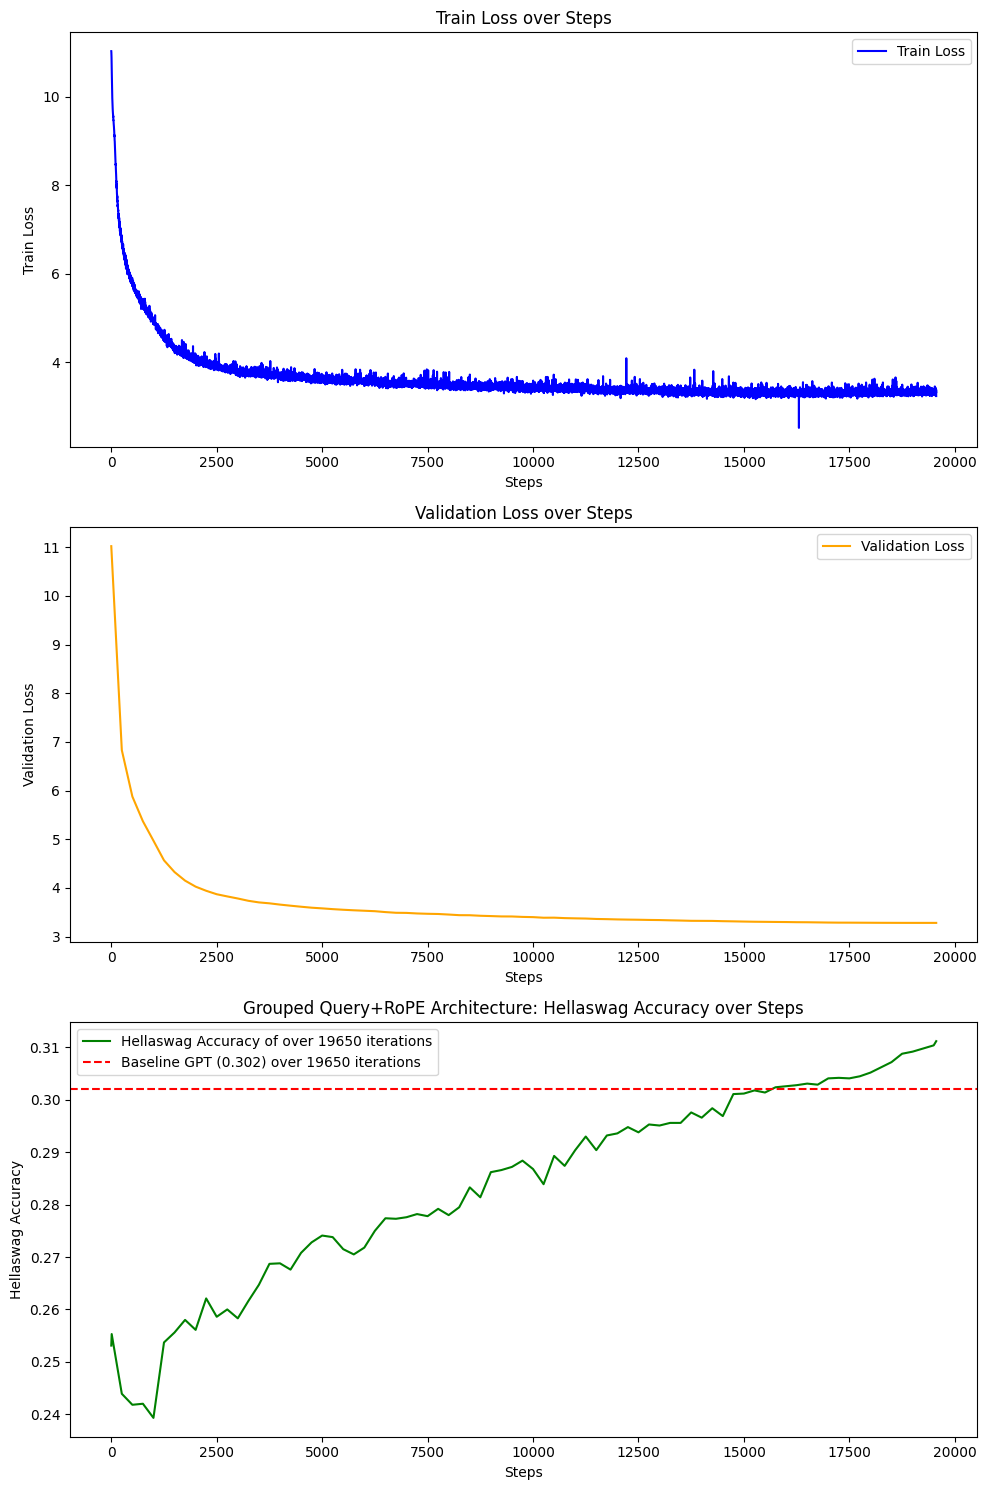

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the log file
log_file_path = '/content/main.log'

# Read the file content
with open(log_file_path, 'r') as file:
    log_content = file.readlines()

# Parsing the log data for the three metrics: Train Loss, Validation Loss, and Hellaswag Accuracy

train_loss_data = []
val_loss_data = []
hellaswag_acc_data = []

# Loop through the log contents and extract the necessary values
for line in log_content:
    # Extracting train loss (s:X trl:Y)
    train_loss_match = re.search(r's:(\d+)\s+trl:([\d\.]+)', line)
    if train_loss_match:
        step = int(train_loss_match.group(1))
        train_loss = float(train_loss_match.group(2))
        train_loss_data.append([step, train_loss])

    # Extracting validation loss (s:X tel:Y)
    val_loss_match = re.search(r's:(\d+)\s+tel:([\d\.]+)', line)
    if val_loss_match:
        step = int(val_loss_match.group(1))
        val_loss = float(val_loss_match.group(2))
        val_loss_data.append([step, val_loss])

    # Extracting hellaswag accuracy (X hella Y)
    hellaswag_match = re.search(r'(\d+)\s+hella\s+([\d\.]+)', line)
    if hellaswag_match:
        step = int(hellaswag_match.group(1))
        accuracy = float(hellaswag_match.group(2))
        hellaswag_acc_data.append([step, accuracy])

# Creating dataframes for each set of data
train_loss_df = pd.DataFrame(train_loss_data, columns=['Step', 'Train Loss'])
val_loss_df = pd.DataFrame(val_loss_data, columns=['Step', 'Validation Loss'])
hellaswag_acc_df = pd.DataFrame(hellaswag_acc_data, columns=['Step', 'Hellaswag Accuracy'])

# Plotting the data
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plotting Train Loss
axs[0].plot(train_loss_df['Step'], train_loss_df['Train Loss'], label='Train Loss', color='blue')
axs[0].set_title('Train Loss over Steps')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Train Loss')

# Plotting Validation Loss
axs[1].plot(val_loss_df['Step'], val_loss_df['Validation Loss'], label='Validation Loss', color='orange')
axs[1].set_title('Validation Loss over Steps')
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Validation Loss')

# Plotting Hellaswag Accuracy
axs[2].plot(hellaswag_acc_df['Step'], hellaswag_acc_df['Hellaswag Accuracy'], label='Hellaswag Accuracy of over 19650 iterations', color='green')
# Add a vertical red line at accuracy 0.302 (baseline GPT)
axs[2].axhline(y=0.302, color='red', linestyle='--', label='Baseline GPT (0.302) over 19650 iterations')
axs[2].set_title('Grouped Query+RoPE Architecture: Hellaswag Accuracy over Steps')
axs[2].set_xlabel('Steps')
axs[2].set_ylabel('Hellaswag Accuracy')

# Adding legends
for ax in axs:
    ax.legend()

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()



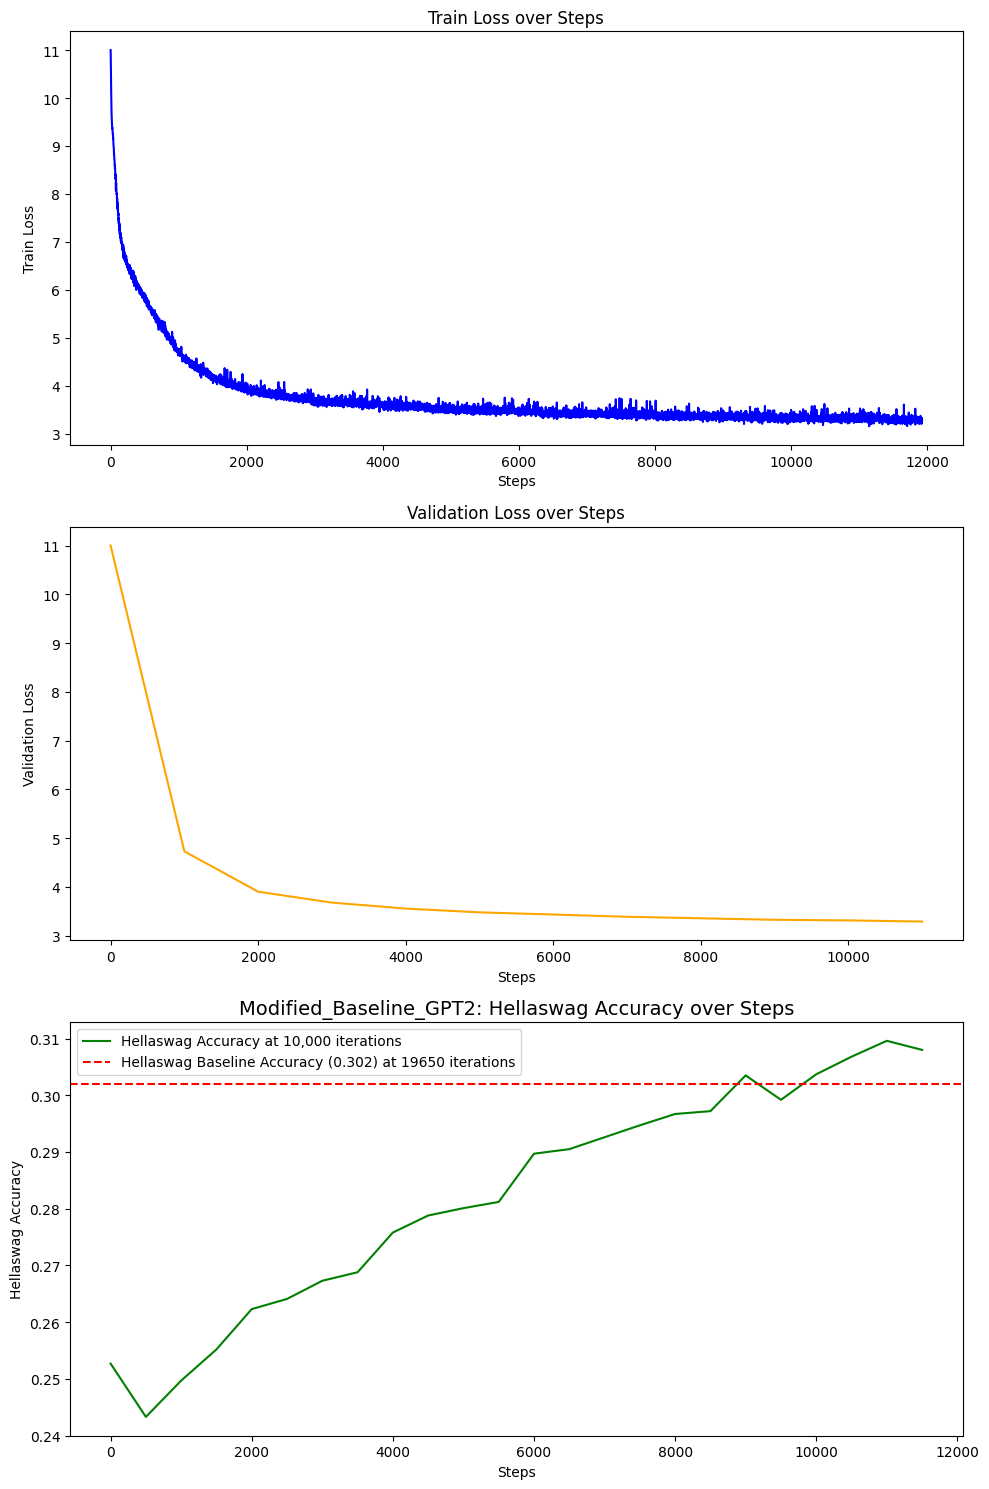

In [16]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Load the log file
log_file_path = '/content/gpt2_slurm.log.log'

# Read the file content
with open(log_file_path, 'r') as file:
    log_content = file.readlines()

# Parsing the log data
train_loss_data = []
val_loss_data = []
hellaswag_acc_data = []

# Extracting the necessary data for train loss, validation loss, and hellaswag accuracy
for line in log_content:
    # Extracting train loss
    train_loss_match = re.search(r'step\s+(\d+)/15000\s+\|\s+train loss\s+([\d\.]+)', line)
    if train_loss_match:
        step = int(train_loss_match.group(1))
        train_loss = float(train_loss_match.group(2))
        train_loss_data.append([step, train_loss])

    # Extracting validation loss
    val_loss_match = re.search(r's:(\d+)\s+tel:([\d\.]+)', line)
    if val_loss_match:
        step = int(val_loss_match.group(1))
        val_loss = float(val_loss_match.group(2))
        val_loss_data.append([step, val_loss])

    # Extracting hellaswag accuracy
    hellaswag_match = re.search(r'(\d+)\s+hellaswag accuracy\s+([\d\.]+)', line)
    if hellaswag_match:
        step = int(hellaswag_match.group(1))
        accuracy = float(hellaswag_match.group(2))
        hellaswag_acc_data.append([step, accuracy])

# Creating dataframes for each set of data
train_loss_df = pd.DataFrame(train_loss_data, columns=['Step', 'Train Loss'])
val_loss_df = pd.DataFrame(val_loss_data, columns=['Step', 'Validation Loss'])
hellaswag_acc_df = pd.DataFrame(hellaswag_acc_data, columns=['Step', 'Hellaswag Accuracy'])

# Plotting the data
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plotting Train Loss
axs[0].plot(train_loss_df['Step'], train_loss_df['Train Loss'], label='Train Loss', color='blue')
axs[0].set_title('Train Loss over Steps')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Train Loss')

# Plotting Validation Loss
axs[1].plot(val_loss_df['Step'], val_loss_df['Validation Loss'], label='Validation Loss', color='orange')
axs[1].set_title('Validation Loss over Steps')
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Validation Loss')

# Plotting Hellaswag Accuracy
axs[2].plot(hellaswag_acc_df['Step'], hellaswag_acc_df['Hellaswag Accuracy'], label='Hellaswag Accuracy at 10,000 iterations', color='green')
axs[2].axhline(y=0.302, color='red', linestyle='--', label='Hellaswag Baseline Accuracy (0.302) at 19650 iterations')
# Adding title and labels
axs[2].set_title('Modified_Baseline_GPT2: Hellaswag Accuracy over Steps', fontsize=14)
axs[2].set_xlabel('Steps')
axs[2].set_ylabel('Hellaswag Accuracy')

# Adding a legend
axs[2].legend()

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# # Displaying the data tables to the user for review
# import ace_tools as tools; tools.display_dataframe_to_user(name="Train Loss Data", dataframe=train_loss_df)
# tools.display_dataframe_to_user(name="Validation Loss Data", dataframe=val_loss_df)
# tools.display_dataframe_to_user(name="Hellaswag Accuracy Data", dataframe=hellaswag_acc_df)
